## Goal: For this Episode of the Series, is to use a multi-class approach to predict the the outcomes of patients with cirrhosis

In [2]:
# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Plotting libraries
#import plotly.express as px

# ML imports

In [3]:
df_train = pd.read_csv(r"..\data\train.csv")
df_test = pd.read_csv(r"..\data\test.csv")

In [4]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("______________________")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("DataFrame Head:")
    print("______________________")
    display(df.head())
    print("\n")

    print("DataFrame Tail:")
    print("______________________")
    display(df.tail())
    print("\n")

    print("DataFrame Description:")
    print("______________________")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("______________________")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("______________________")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("______________________")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("______________________")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df_train)

DataFrame Information:
______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothr

None



DataFrame Head:
______________________


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C




DataFrame Tail:
______________________


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D
7904,7904,1978,D-penicillamine,19237,F,N,N,N,N,0.7,256.0,3.23,22.0,645.0,74.40,85.0,336.0,10.3,3.0,C




DataFrame Description:
______________________


,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00




Number of Null Values:
______________________


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64



Number of Duplicated Rows:
______________________


0



Number of Unique Values:
______________________


id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64



DataFrame Shape:
______________________
Rows: 7905, Columns: 20


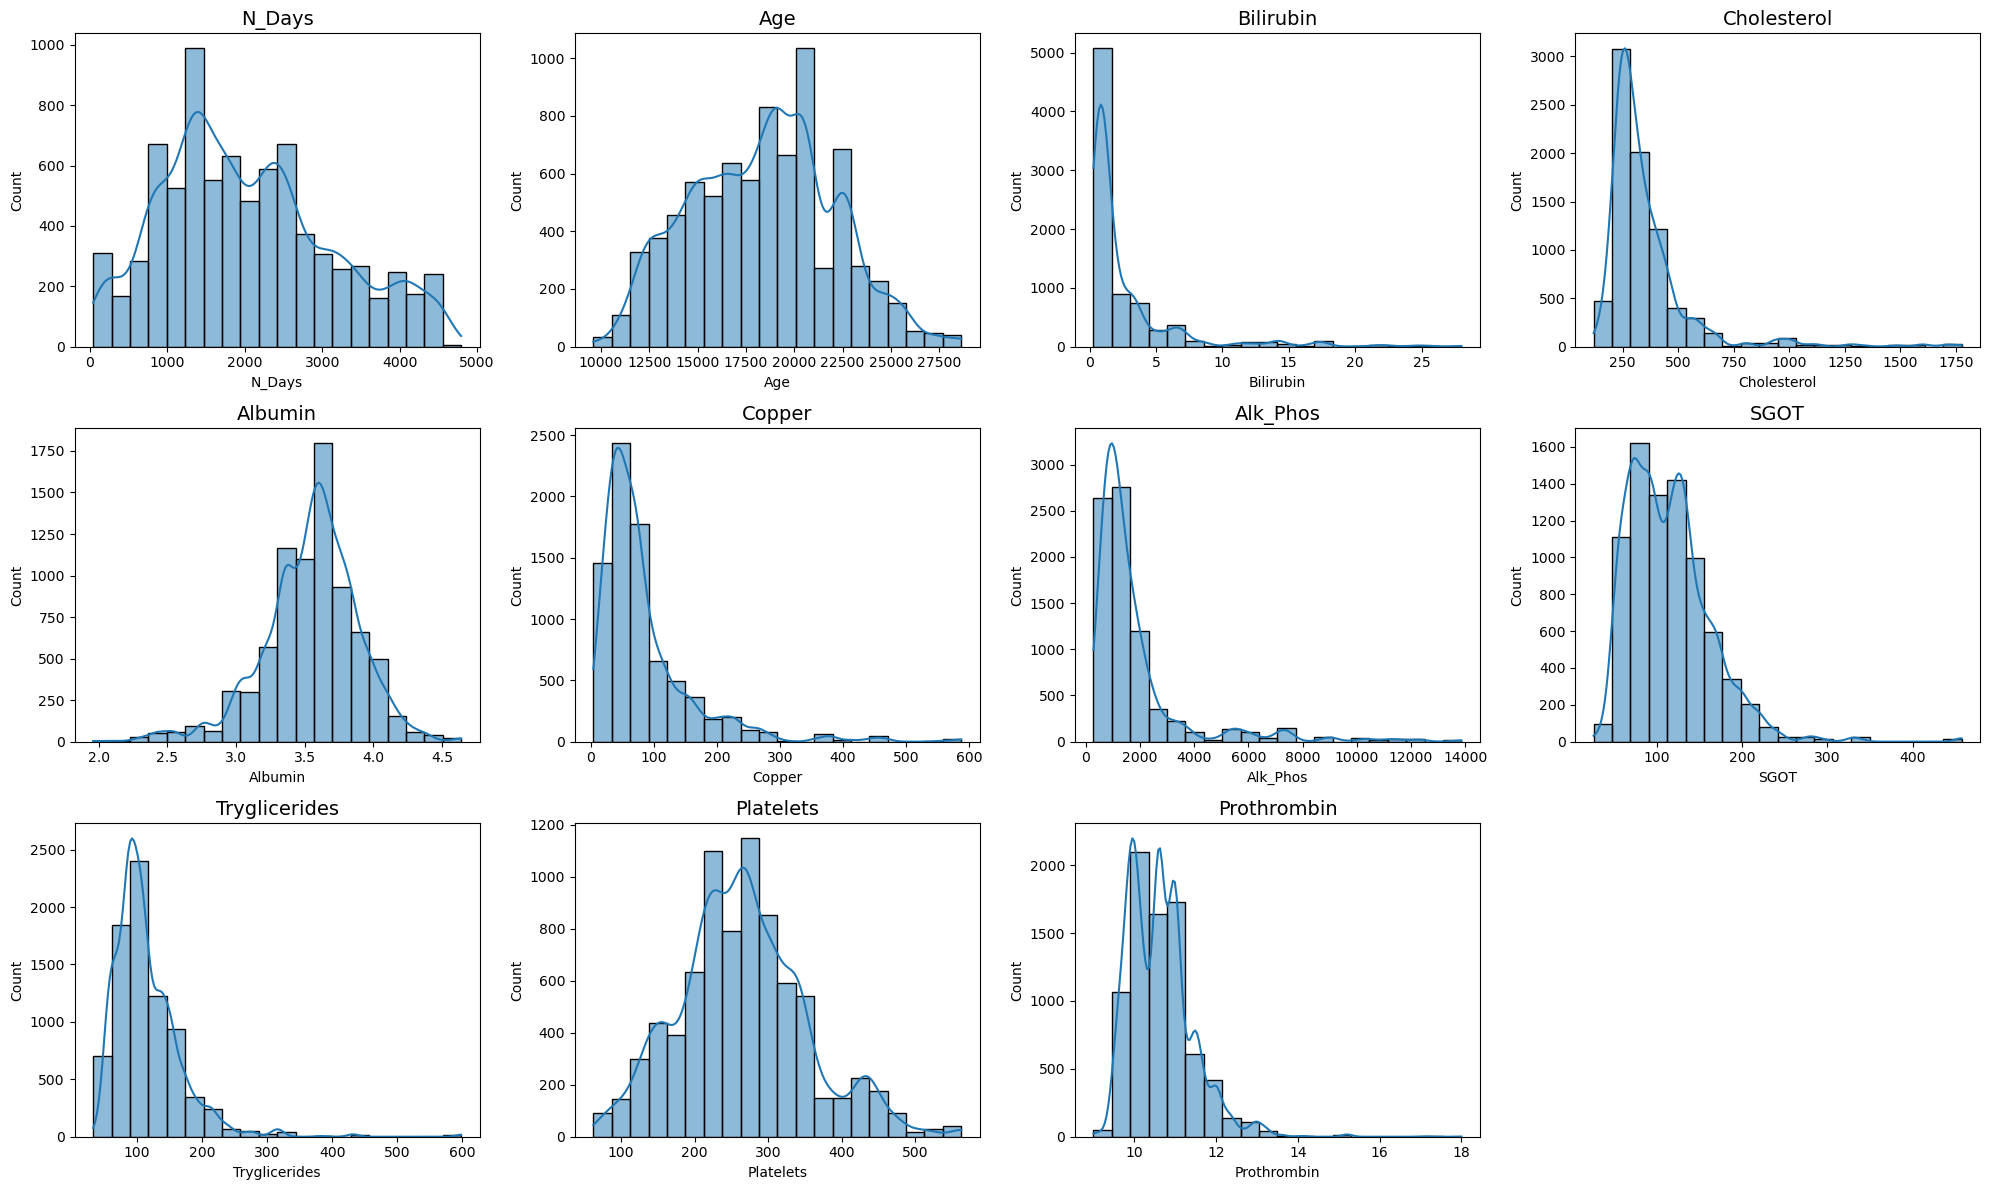

In [12]:
def prelim_eda_histplot(df):
    """
    Create a histogram plot of each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    columns_to_plot = df.drop(['id','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage','Status'], axis=1)      


    num_columns = len(columns_to_plot.columns)
    num_rows = (num_columns - 1) // 4 + 1  # Calculate the number of rows based on the number of columns
    num_cols = min(num_columns, 4)  # Set the number of columns to 4 or the number of columns in the DataFrame, whichever is smaller
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))  # Adjust the figsize as needed

    # Loop over selected columns and create histogram plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data=df, x=column, ax=axes[row, col], kde=True, bins=20)
        axes[row, col].set_title(f'{column}', fontsize=14)
        axes[row, col].set_aspect('auto')

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

prelim_eda_histplot(df_train)

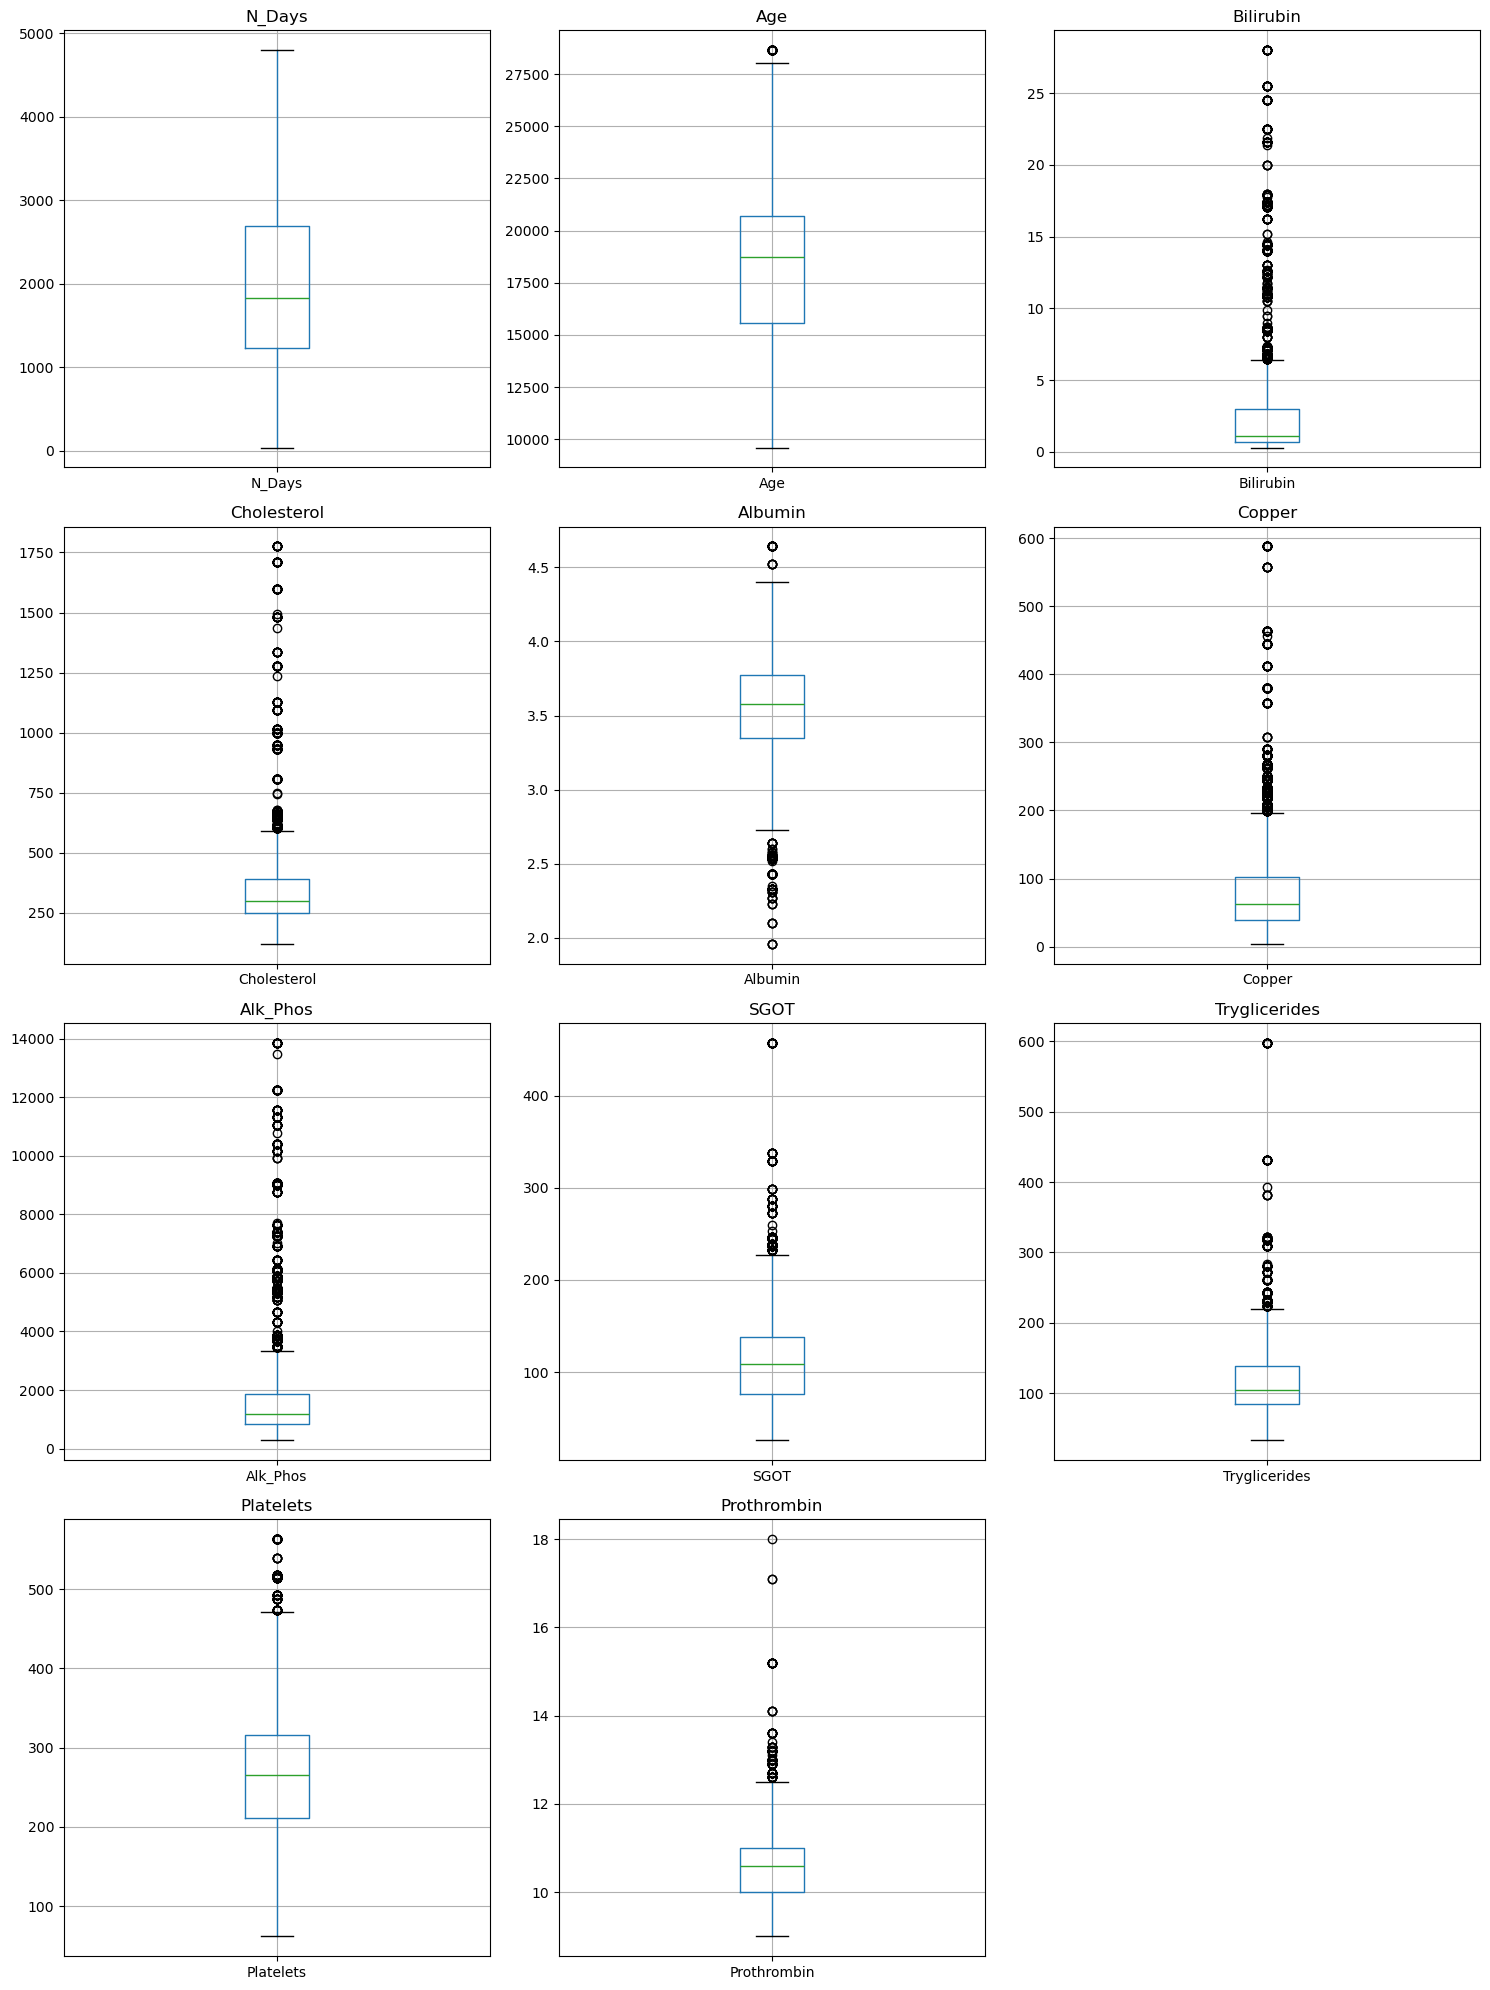

In [19]:

def create_boxplots(df, exclude_columns):
    """
    Create a series of boxplot subplots for the given DataFrame, excluding specified columns.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    exclude_columns (list): List of column names to exclude from plotting.

    Returns:
    matplotlib.figure.Figure: The figure object containing the subplots.
    """
    # Dropping the specified columns
    df_to_plot = df.drop(exclude_columns, axis=1)
    num_cols = len(df_to_plot.columns)
    
    # Determining the layout of the subplot grid
    cols_per_row = 3
    rows = (num_cols + cols_per_row - 1) // cols_per_row

    # Creating the subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten in case of a single row

    for i, col in enumerate(df_to_plot.columns):
        df_to_plot.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)

    # Hide unused subplots
    for j in range(i + 1, rows * cols_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    return fig

# Columns to exclude from the plot
exclude_columns = ['id', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']

# Creating the boxplot subplots
fig = create_boxplots(df_train, exclude_columns)
plt.show()


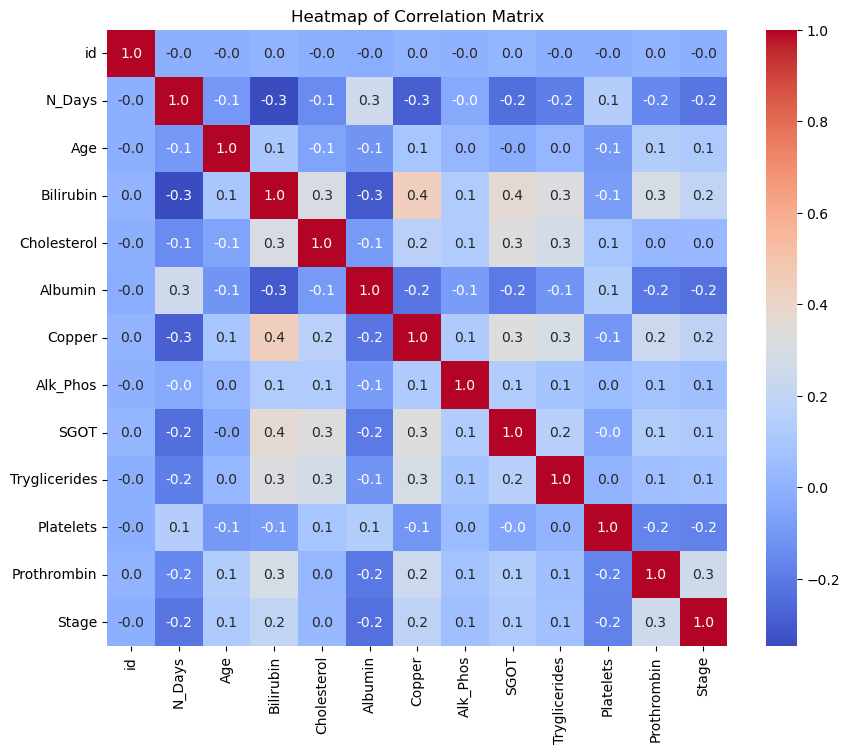

In [25]:
def create_heatmap(df, figsize=(10, 8), annot=True, cmap='coolwarm',fmt='.1f'):
    """
    Create a heatmap for the correlation matrix of the numeric columns in the given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    figsize (tuple): Size of the heatmap.
    annot (bool): If True, write the data value in each cell.
    cmap (str): Colormap used for the heatmap.

    Returns:
    matplotlib.figure.Figure: The figure object containing the heatmap.
    """
    plt.figure(figsize=figsize)

    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()

    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=fmt)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

# Example usage
create_heatmap(df_train)